<a href="https://colab.research.google.com/github/adityajain2407/aj-dav-2-ref/blob/main/10_aj_binomial_geometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom, geom
import math

In [3]:
'''
Binomial means - each trial as a fixed prob of success and we are counting the number of success

Bernoli - is a special case of Binomial iwth n = 1 (one trial)
'''

'\nBinomial means - each trial as a fixed prob of success and we are counting the number of success\n\nBernoli - is a special case of Binomial iwth n = 1 (one trial)\n'

# One interview "One Trial"

Suppose you are giving one interview. Let X denote number of offer letters you can get. What are all the possible values that X can take?


n=1, X $\in$ {0, 1}

In [4]:
p = 0.1 # 10% success rate

In [5]:
x_vals = [0, 1] # Number of offer letters

In [6]:
probs = [1-p, p] # Probability of 0 or 1 offer letter
probs

[0.9, 0.1]

<Axes: >

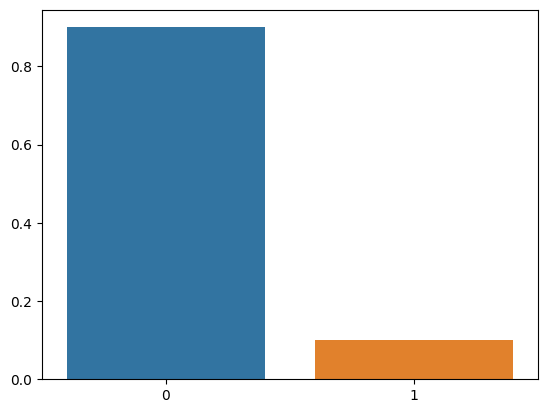

In [7]:
sns.barplot(x=x_vals, y=probs)

For one trial, this probability mass function represents "Bernoulli Distribution"

Bernoulli is a special case of Binomial with n = 1

# Two trials

Question: Suppose you are giving two interviews. Let X denote number of offer letters you can get. What are all the possible values that X can take?

Answer: {0, 1, 2}

In [8]:
n = 2
p = 0.1

In [9]:
x_vals = [0, 1, 2]

In [10]:
probs = [
    (1 - p) * (1 - p), # prob of X=0
    p*(1-p) + (1-p)*p, # prob of X = 1
    p*p, # prob of X = 2
]
probs

[0.81, 0.18000000000000002, 0.010000000000000002]

<Axes: >

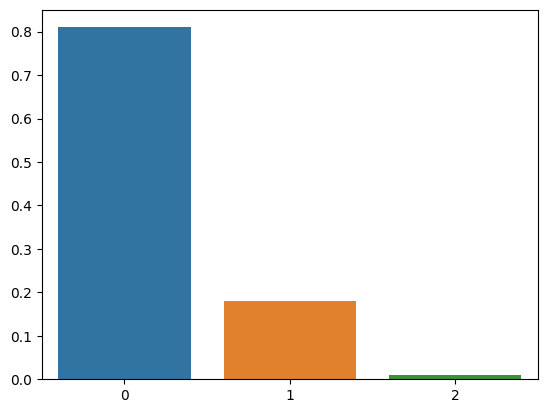

In [11]:
sns.barplot(x=x_vals, y=probs) # PMF: probability mass function

# Three trials (n=3)

In [12]:
p = 0.1 # probability of success

In [13]:
x_vals = [0, 1, 2, 3]

In [14]:
probs = [
    (1-p)*(1-p)*(1-p), #X=0
    (1-p)*(1-p)*p + (1-p)*p*(1-p) + p*(1-p)*(1-p), #X=1
    (1-p)*p*p + p*p*(1-p) + p*(1-p)*p, #X=2
    p*p*p, #X=3
]

In [15]:
probs

[0.7290000000000001,
 0.24300000000000005,
 0.027000000000000003,
 0.0010000000000000002]

<Axes: >

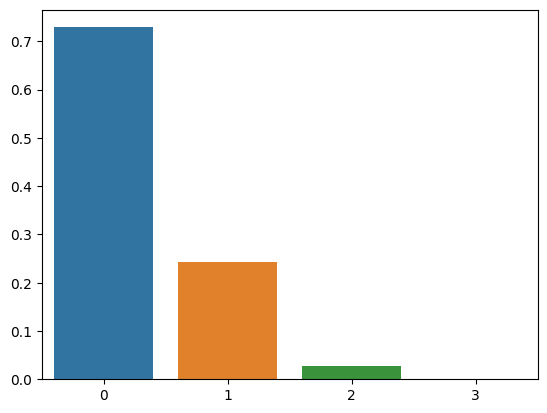

In [16]:
sns.barplot(x=x_vals, y=probs)


<Axes: >

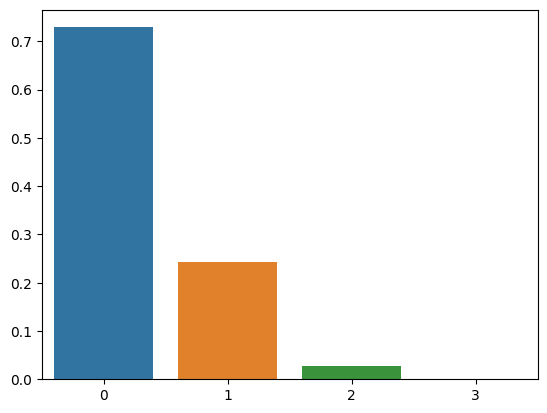

In [17]:
probs_binom = binom.pmf(x_vals, n=3, p=0.1) #giving x-vals just to get prob for all x
sns.barplot(x=x_vals, y=probs_binom)

In [33]:
probs_binom = binom.pmf(0, n=3, p=0.1) #when want prob for a given x only
probs_binom

0.7290000000000001

# N Trials

<Axes: >

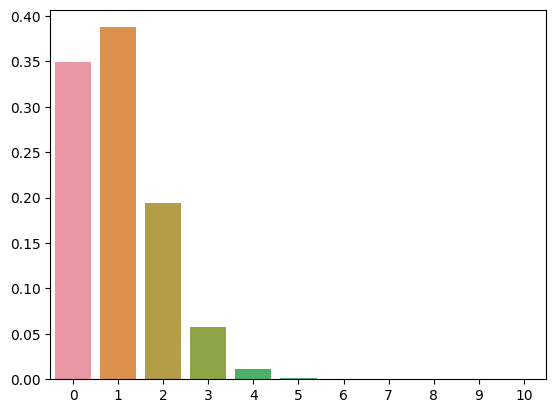

In [34]:
n = 10
p = 0.1
x_vals = np.arange(0, n+1)
probs_binom = binom.pmf(x_vals, n=n, p=p)
sns.barplot(x=x_vals, y=probs_binom)

#interpretation--> if i give 10 interviews with success rate of offerletter as 0.1, then I am most lifekly to get 0 or 1 offer letter

<Axes: >

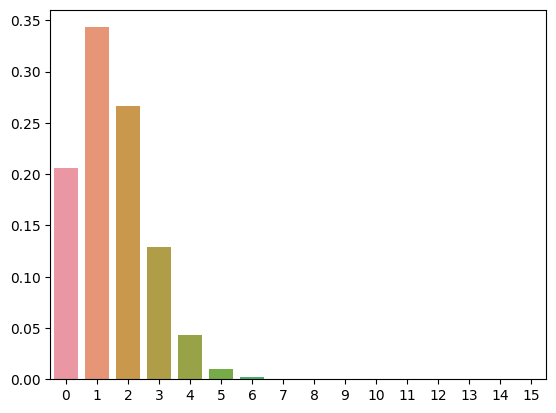

In [37]:
n = 15 #just play around with it
p = 0.1 #run this for 0.3, 0.5, 0.7 and show the behavviour
x_vals = np.arange(0, n+1)
probs_binom = binom.pmf(x_vals, n=n, p=p)
sns.barplot(x=x_vals, y=probs_binom)


#extra - with 3 outcomes - its called multinomial = as in coin toss and succ/fail only 2 outcome - so binomial

<Axes: >

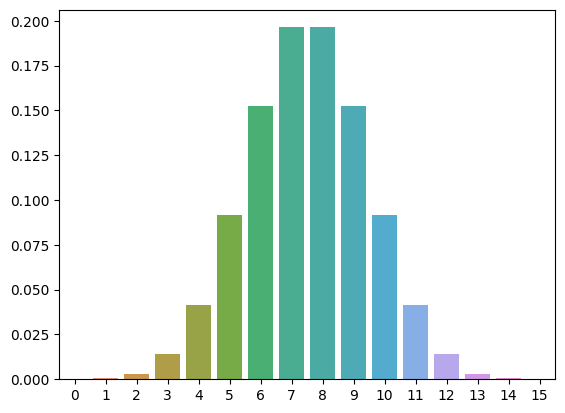

In [19]:
n = 15
p = 0.5
x_vals = np.arange(0, n+1)
probs_binom = binom.pmf(x_vals, n=n, p=p)
sns.barplot(x=x_vals, y=probs_binom)

# Binomial formula

In [20]:
n = 15
p = 0.1
#from n boxes, no of ways to select k boxes. - once i put success tlo k boxes, remakning are automatocally failures

In [21]:
binom.pmf(k=3, n=n, p=p) # nCk p^k (1-p)^{n-k} -- this formula is used for each k, to find using pmf method

0.1285054390988551

In [22]:
math.comb(n, 3) * p**3 * (1-p)**(n-3) #aath.comb is nck

0.1285054390988551

In [23]:
math.comb(3, 2) * 0.1**2 * 0.9*1

0.027000000000000007

# Geometric

In [ ]:
#here we are interested in no.of intervewis as number of offer letrer is foxed to 1 - first success

X: Number of interviews till first success

In [24]:
p = 0.1

In [25]:
x_vals = np.arange(1, 20) # technically, infinite values

In [26]:
probs_geom = geom.pmf(x_vals, p=p)

<Axes: >

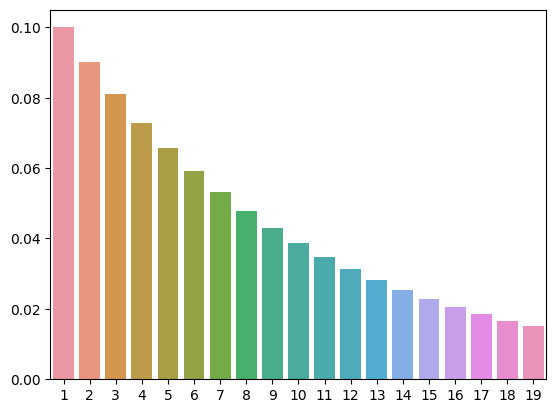

In [27]:
sns.barplot(x=x_vals, y=probs_geom) #each next val prob os getting multiplied by 0.9 = and this can go pm

# Binomial CDF

Messi and penalty:
Success rate is 80%

He kicks 10 times. What is the probability of having 7 or less successes?

In [28]:
n = 10
p = 0.8

In [29]:
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

In [30]:
np.sum([binom.pmf(k=i, n=n, p=p) for i in np.arange(0, 8)]) #adding all the pmf from 0 to 7 (k)
#cdf is sum of individual pmfs (usually when <= asked = cumulative)

0.3222004735999996

In [31]:
prob = 0
for i in range(8):
    prob += binom.pmf(k=i, n=n, p=p)
prob

0.3222004735999996

In [ ]:
#usually we will solve x<=4 types of questions using compleement : 1- x<= format as cdf is avialalbe which captures 0 to i in one go

In [ ]:
#praactical usecaser - as an HR how many intervaiews shall I take to get my first hire candidate